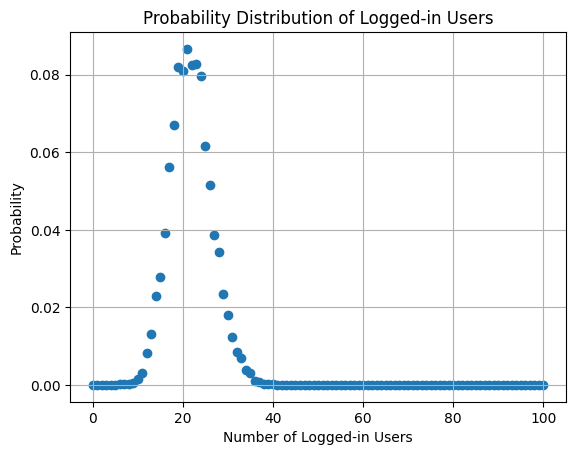

In [1]:
import random as rnd
import matplotlib.pyplot as plt

def decision(probability):
    return rnd.random() < probability

def simulate(loginProbability, users, iterations):
    nodeCounter = [0 for x in range(users + 1)]
    userStates = [False for x in range(users)]
    loggedInUsers = 0
    
    for i in range(0, iterations):
        for k in range(0, users):
            if userStates[k]:
                logoutProbability = 1 - (0.008 * loggedInUsers + 0.1)
                logout = decision(logoutProbability)
                if logout:
                    userStates[k] = False
                    loggedInUsers = loggedInUsers - 1
            else:
                login = decision(loginProbability)
                if login:
                    userStates[k] = True
                    loggedInUsers = loggedInUsers + 1

        if i > 1000:
            nodeCounter[loggedInUsers] = nodeCounter[loggedInUsers] + 1

    for i in range(0, len(nodeCounter)):
        nodeCounter[i] = float(nodeCounter[i]) / (iterations - 1000)
    return nodeCounter

prob = simulate(0.2, 100, 10**4)

plt.scatter(range(0, 101), prob)
plt.grid(True)
plt.title("Probability Distribution of Logged-in Users")
plt.xlabel("Number of Logged-in Users")
plt.ylabel("Probability")

plt.show()
